# Introduction


**What?** How to treat categorical dataset and how to use feature selection



# Import modules

In [13]:
from pandas import read_csv
from matplotlib import pyplot
from functools import partial
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Load the dataset


- The so-called Breast cancer dataset that has been widely studied as a machine learning dataset since the 1980s.
- The dataset classifies breast cancer patient data as either a recurrence or no recurrence of cancer. 
- There are 286 examples and nine input variables. It is a binary classification problem. 
- A naive model can achieve an accuracy of  70 percent on this dataset. A good score is about 76 percent.



In [2]:
filename = "../DATASETS/breast-cancer.csv"
# load the dataset
data = read_csv(filename, header = None)
# retrieve array
dataset = data.values
# split into input and output variables
X = dataset[:, :-1]
y = dataset[:,-1]
# format all fields as string
X = X.astype(str)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (286, 9)
y shape:  (286,)


In [3]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) # summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


# Dealing with categorical data


- Let’s look at how we can encode it for modeling. We can use the OrdinalEncoder class from 
scikit-learn to encode each variable to integers. This is a flexible class and does allow the 
order of the categories to be specified as arguments if any such order is known.

- We also need to prepare the target variable. It is a binary classification problem, so we need 
to map the two class labels to 0 and 1. This is a type of ordinal encoding, and scikit-learn
provides the LabelEncoder class specifically designed for this purpose. We could just as easily
use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for 
encoding a single variable 



In [5]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

print('Train', X_train_enc.shape, y_train_enc.shape)
print('Test', X_test_enc.shape, y_test_enc.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


In [6]:
X_train[1]

array(["'30-39'", "'premeno'", "'5-9'", "'0-2'", "'no'", "'2'", "'left'",
       "'right_low'", "'no'"], dtype='<U11')

In [7]:
X_train_enc[1]

array([1., 2., 9., 0., 0., 1., 0., 3., 0.])

In [8]:
y_train[1]

"'no-recurrence-events'"

In [9]:
y_train_enc[1]

0

# Feature selection with categorical data


- They are 2 popular methods for feature selection while working with catergorical inputs:

- **Chi-Squared Statistic**
- **Mutual Information Statistic** (make sure you use random_state to reproduce your results!)



In [10]:
def selectFeatures(X_train, y_train, X_test, method): 
    
    """Select feature
    
    random_state = 1, determines random number generation for adding 
    small noise to continuous variables in order to remove repeated 
    values. 
    Pass an int for -->>reproducible<<-- results across multiple function calls.
    Read this to see how to t pass random_state:
    https://stackoverflow.com/questions/44347683/how-to-set-parameters-to-score-function-in-sklearn-selectkbest
    """    
    
    if method.__name__ == "mutual_info_classif":                
        print("Using: ", str(method.__name__))
        fs = SelectKBest(score_func = partial(method, random_state = 0), k = 'all') 
        fs.fit(X_train, y_train)
    else:
        print("Using: ", str(method.__name__))
        fs = SelectKBest(score_func = method, k = 'all')         
        fs.fit(X_train, y_train)
        
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

## Features selection based on Chi-squared


- Chi-Squared Statistic test for independence between categorical variables. 
- The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.



Using:  chi2
Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


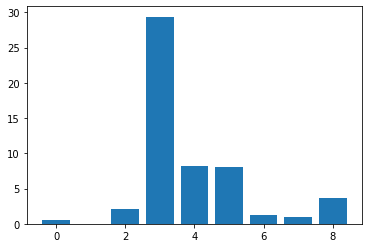

In [11]:
# feature selection
X_train_fs, X_test_fs, fs = selectFeatures(X_train_enc, y_train_enc, X_test_enc, chi2)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()


- This clearly shows that feature 3 might be the most relevant (according to chi-squared) and that perhaps four of the nine input features are the most relevant. 
- We could setk = 4 when configuring the SelectKBest to select these top four features.



## Features selection based on mutual information


- Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection. 
- Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. 



Using:  mutual_info_classif
Feature 0: 0.107168
Feature 1: 0.000000
Feature 2: 0.057277
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.047626
Feature 6: 0.028771
Feature 7: 0.000000
Feature 8: 0.000000


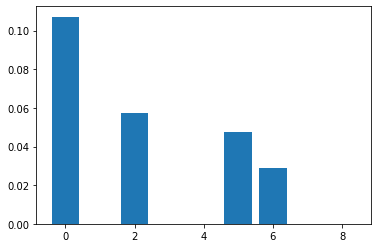

In [12]:
# feature selection
X_train_fs, X_test_fs, fs = selectFeatures(X_train_enc, 
                                           y_train_enc, 
                                           X_test_enc, 
                                           mutual_info_classif)

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Conclusions


- The two methods seam to provide two different answers, because we are talking about two different methods afer all.
- What I'd look would be for features that consistenly have the same low scaore for both methods.
- Pay attention that mutual_info_classif throws you different value unless you fix the seed!



# Reference


- [Python functools.partial and sklearn](https://stackoverflow.com/questions/44347683/how-to-set-parameters-to-score-function-in-sklearn-selectkbest)

